In [1]:
import numpy as np
import pandas as pd

In [2]:
match = pd.read_csv('matches.csv')
delivery = pd.read_csv('deliveries.csv')

In [3]:
match.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [63]:
match['venue'].unique()

array(['Rajiv Gandhi International Stadium, Uppal',
       'Maharashtra Cricket Association Stadium',
       'Saurashtra Cricket Association Stadium', 'Holkar Cricket Stadium',
       'M Chinnaswamy Stadium', 'Wankhede Stadium', 'Eden Gardens',
       'Feroz Shah Kotla',
       'Punjab Cricket Association IS Bindra Stadium, Mohali',
       'Green Park', 'Punjab Cricket Association Stadium, Mohali',
       'Sawai Mansingh Stadium', 'MA Chidambaram Stadium, Chepauk',
       'Dr DY Patil Sports Academy', 'Newlands', "St George's Park",
       'Kingsmead', 'SuperSport Park', 'Buffalo Park',
       'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Shaheed V

In [4]:
match.shape

(756, 18)

In [5]:
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [6]:
total_score_df = delivery.groupby(['match_id','inning']).sum()['total_runs'].reset_index()

In [7]:
total_score_df = total_score_df[total_score_df['inning'] == 1]

In [8]:
total_score_df

,match_id,inning,total_runs
0,1,1,207
2,2,1,184
4,3,1,183
6,4,1,163
8,5,1,157
...,...,...,...
1518,11347,1,143
1520,11412,1,136
1522,11413,1,171
1524,11414,1,155


In [9]:
match_df = match.merge(total_score_df[['match_id','total_runs']],left_on='id',right_on='match_id')

In [10]:
match_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,207
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2,184
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,3,183
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,4,163
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi,11347,143
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould,11412,136
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN,11413,171
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin,11414,155


In [11]:
match_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [12]:
match_df = match_df[match_df['dl_applied'] == 0]

In [13]:
match_df = match_df[['match_id','venue','winner','total_runs']]

In [14]:
delivery_df = match_df.merge(delivery,on='match_id')

In [15]:
delivery_df = delivery_df[delivery_df['inning'] == 2]

In [16]:
delivery_df

,match_id,venue,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
125,1,"Rajiv Gandhi International Stadium, Uppal",Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,0,0,1,0,1,NaN,NaN,NaN
126,1,"Rajiv Gandhi International Stadium, Uppal",Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,0,0,NaN,NaN,NaN
127,1,"Rajiv Gandhi International Stadium, Uppal",Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,0,0,NaN,NaN,NaN
128,1,"Rajiv Gandhi International Stadium, Uppal",Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,0,0,0,2,0,2,NaN,NaN,NaN
129,1,"Rajiv Gandhi International Stadium, Uppal",Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,0,0,0,4,0,4,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175865,11415,Rajiv Gandhi Intl. Cricket Stadium,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,0,0,0,1,0,1,NaN,NaN,NaN
175866,11415,Rajiv Gandhi Intl. Cricket Stadium,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,0,0,0,2,0,2,NaN,NaN,NaN
175867,11415,Rajiv Gandhi Intl. Cricket Stadium,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
175868,11415,Rajiv Gandhi Intl. Cricket Stadium,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [17]:
delivery_df = delivery_df.reset_index()

In [18]:
delivery_df['id'] = delivery_df['index']

In [19]:
from pandasql import sqldf

In [20]:
delivery_df

,index,match_id,venue,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,...,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,id
0,125,1,"Rajiv Gandhi International Stadium, Uppal",Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,...,0,0,0,1,0,1,NaN,NaN,NaN,125
1,126,1,"Rajiv Gandhi International Stadium, Uppal",Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,...,0,0,0,0,0,0,NaN,NaN,NaN,126
2,127,1,"Rajiv Gandhi International Stadium, Uppal",Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,...,0,0,0,0,0,0,NaN,NaN,NaN,127
3,128,1,"Rajiv Gandhi International Stadium, Uppal",Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,...,0,0,0,2,0,2,NaN,NaN,NaN,128
4,129,1,"Rajiv Gandhi International Stadium, Uppal",Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,...,0,0,0,4,0,4,NaN,NaN,NaN,129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85074,175865,11415,Rajiv Gandhi Intl. Cricket Stadium,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,...,0,0,0,1,0,1,NaN,NaN,NaN,175865
85075,175866,11415,Rajiv Gandhi Intl. Cricket Stadium,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,...,0,0,0,2,0,2,NaN,NaN,NaN,175866
85076,175867,11415,Rajiv Gandhi Intl. Cricket Stadium,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,...,0,0,0,1,0,1,SR Watson,run out,KH Pandya,175867
85077,175868,11415,Rajiv Gandhi Intl. Cricket Stadium,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,...,0,0,0,2,0,2,NaN,NaN,NaN,175868


In [21]:
pd.options.display.max_columns=30

In [22]:
delivery_df

,index,match_id,venue,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,id
0,125,1,"Rajiv Gandhi International Stadium, Uppal",Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,Mandeep Singh,A Nehra,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN,125
1,126,1,"Rajiv Gandhi International Stadium, Uppal",Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,CH Gayle,A Nehra,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,126
2,127,1,"Rajiv Gandhi International Stadium, Uppal",Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,CH Gayle,A Nehra,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,127
3,128,1,"Rajiv Gandhi International Stadium, Uppal",Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,CH Gayle,A Nehra,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN,128
4,129,1,"Rajiv Gandhi International Stadium, Uppal",Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,CH Gayle,A Nehra,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN,129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85074,175865,11415,Rajiv Gandhi Intl. Cricket Stadium,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN,175865
85075,175866,11415,Rajiv Gandhi Intl. Cricket Stadium,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN,175866
85076,175867,11415,Rajiv Gandhi Intl. Cricket Stadium,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,0,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya,175867
85077,175868,11415,Rajiv Gandhi Intl. Cricket Stadium,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN,175868


In [23]:
result = sqldf("select *,SUM(total_runs_y) OVER(PARTITION BY match_id ORDER BY id ) as current_score from delivery_df ORDER BY id")

In [24]:
result = sqldf("""select *,SUM(wickets_lost) OVER(PARTITION BY match_id ORDER BY id ) as total_wickets_lost from  (select *,CASE
        WHEN dismissal_kind NOT NULL  THEN 1
        ELSE 0
    END AS wickets_lost
    from result) as b
    ORDER BY id
    """)

In [25]:
result

,index,match_id,venue,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,id,current_score,wickets_lost,total_wickets_lost
0,125,1,"Rajiv Gandhi International Stadium, Uppal",Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,Mandeep Singh,A Nehra,0,0,0,0,0,0,1,0,1,None,None,None,125,1,0,0
1,126,1,"Rajiv Gandhi International Stadium, Uppal",Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,CH Gayle,A Nehra,0,0,0,0,0,0,0,0,0,None,None,None,126,1,0,0
2,127,1,"Rajiv Gandhi International Stadium, Uppal",Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,CH Gayle,A Nehra,0,0,0,0,0,0,0,0,0,None,None,None,127,1,0,0
3,128,1,"Rajiv Gandhi International Stadium, Uppal",Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,CH Gayle,A Nehra,0,0,0,0,0,0,2,0,2,None,None,None,128,3,0,0
4,129,1,"Rajiv Gandhi International Stadium, Uppal",Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,CH Gayle,A Nehra,0,0,0,0,0,0,4,0,4,None,None,None,129,7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85074,175865,11415,Rajiv Gandhi Intl. Cricket Stadium,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,0,0,0,0,0,1,0,1,None,None,None,175865,152,0,5
85075,175866,11415,Rajiv Gandhi Intl. Cricket Stadium,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,0,0,0,0,0,2,0,2,None,None,None,175866,154,0,5
85076,175867,11415,Rajiv Gandhi Intl. Cricket Stadium,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,0,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya,175867,155,1,6
85077,175868,11415,Rajiv Gandhi Intl. Cricket Stadium,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,0,0,0,0,0,2,0,2,None,None,None,175868,157,0,6


In [26]:
result['runs_left'] = result['total_runs_x']+1 - result['current_score']

In [27]:
result

,index,match_id,venue,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,id,current_score,wickets_lost,total_wickets_lost,runs_left
0,125,1,"Rajiv Gandhi International Stadium, Uppal",Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,Mandeep Singh,A Nehra,0,0,0,0,0,0,1,0,1,None,None,None,125,1,0,0,207
1,126,1,"Rajiv Gandhi International Stadium, Uppal",Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,CH Gayle,A Nehra,0,0,0,0,0,0,0,0,0,None,None,None,126,1,0,0,207
2,127,1,"Rajiv Gandhi International Stadium, Uppal",Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,CH Gayle,A Nehra,0,0,0,0,0,0,0,0,0,None,None,None,127,1,0,0,207
3,128,1,"Rajiv Gandhi International Stadium, Uppal",Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,CH Gayle,A Nehra,0,0,0,0,0,0,2,0,2,None,None,None,128,3,0,0,205
4,129,1,"Rajiv Gandhi International Stadium, Uppal",Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,CH Gayle,A Nehra,0,0,0,0,0,0,4,0,4,None,None,None,129,7,0,0,201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85074,175865,11415,Rajiv Gandhi Intl. Cricket Stadium,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,0,0,0,0,0,1,0,1,None,None,None,175865,152,0,5,1
85075,175866,11415,Rajiv Gandhi Intl. Cricket Stadium,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,0,0,0,0,0,2,0,2,None,None,None,175866,154,0,5,-1
85076,175867,11415,Rajiv Gandhi Intl. Cricket Stadium,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,0,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya,175867,155,1,6,-2
85077,175868,11415,Rajiv Gandhi Intl. Cricket Stadium,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,0,0,0,0,0,2,0,2,None,None,None,175868,157,0,6,-4


In [28]:
result['balls_left'] = 126 - (result['over']*6 + result['ball'])

In [29]:
result['wickets_left'] = 10 - result['total_wickets_lost']

In [30]:
result

,index,match_id,venue,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,...,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,id,current_score,wickets_lost,total_wickets_lost,runs_left,balls_left,wickets_left
0,125,1,"Rajiv Gandhi International Stadium, Uppal",Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,Mandeep Singh,A Nehra,0,0,...,0,0,1,0,1,None,None,None,125,1,0,0,207,119,10
1,126,1,"Rajiv Gandhi International Stadium, Uppal",Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,CH Gayle,A Nehra,0,0,...,0,0,0,0,0,None,None,None,126,1,0,0,207,118,10
2,127,1,"Rajiv Gandhi International Stadium, Uppal",Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,CH Gayle,A Nehra,0,0,...,0,0,0,0,0,None,None,None,127,1,0,0,207,117,10
3,128,1,"Rajiv Gandhi International Stadium, Uppal",Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,CH Gayle,A Nehra,0,0,...,0,0,2,0,2,None,None,None,128,3,0,0,205,116,10
4,129,1,"Rajiv Gandhi International Stadium, Uppal",Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,CH Gayle,A Nehra,0,0,...,0,0,4,0,4,None,None,None,129,7,0,0,201,115,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85074,175865,11415,Rajiv Gandhi Intl. Cricket Stadium,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,0,...,0,0,1,0,1,None,None,None,175865,152,0,5,1,4,5
85075,175866,11415,Rajiv Gandhi Intl. Cricket Stadium,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,0,...,0,0,2,0,2,None,None,None,175866,154,0,5,-1,3,5
85076,175867,11415,Rajiv Gandhi Intl. Cricket Stadium,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,0,...,0,0,1,0,1,SR Watson,run out,KH Pandya,175867,155,1,6,-2,2,4
85077,175868,11415,Rajiv Gandhi Intl. Cricket Stadium,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,0,...,0,0,2,0,2,None,None,None,175868,157,0,6,-4,1,4


In [31]:
def victory(row):
    return 1 if row['batting_team'] == row['winner'] else 0

In [32]:
result['victory'] = result.apply(victory,axis=1)

In [33]:
result

,index,match_id,venue,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,...,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,id,current_score,wickets_lost,total_wickets_lost,runs_left,balls_left,wickets_left,victory
0,125,1,"Rajiv Gandhi International Stadium, Uppal",Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,Mandeep Singh,A Nehra,0,0,...,0,1,0,1,None,None,None,125,1,0,0,207,119,10,0
1,126,1,"Rajiv Gandhi International Stadium, Uppal",Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,CH Gayle,A Nehra,0,0,...,0,0,0,0,None,None,None,126,1,0,0,207,118,10,0
2,127,1,"Rajiv Gandhi International Stadium, Uppal",Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,CH Gayle,A Nehra,0,0,...,0,0,0,0,None,None,None,127,1,0,0,207,117,10,0
3,128,1,"Rajiv Gandhi International Stadium, Uppal",Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,CH Gayle,A Nehra,0,0,...,0,2,0,2,None,None,None,128,3,0,0,205,116,10,0
4,129,1,"Rajiv Gandhi International Stadium, Uppal",Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,CH Gayle,A Nehra,0,0,...,0,4,0,4,None,None,None,129,7,0,0,201,115,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85074,175865,11415,Rajiv Gandhi Intl. Cricket Stadium,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,0,...,0,1,0,1,None,None,None,175865,152,0,5,1,4,5,0
85075,175866,11415,Rajiv Gandhi Intl. Cricket Stadium,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,0,...,0,2,0,2,None,None,None,175866,154,0,5,-1,3,5,0
85076,175867,11415,Rajiv Gandhi Intl. Cricket Stadium,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,0,...,0,1,0,1,SR Watson,run out,KH Pandya,175867,155,1,6,-2,2,4,0
85077,175868,11415,Rajiv Gandhi Intl. Cricket Stadium,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,0,...,0,2,0,2,None,None,None,175868,157,0,6,-4,1,4,0


In [34]:
df = result[['batting_team','bowling_team','venue','runs_left','balls_left','wickets_left','victory']]

In [35]:
df

,batting_team,bowling_team,venue,runs_left,balls_left,wickets_left,victory
0,Royal Challengers Bangalore,Sunrisers Hyderabad,"Rajiv Gandhi International Stadium, Uppal",207,119,10,0
1,Royal Challengers Bangalore,Sunrisers Hyderabad,"Rajiv Gandhi International Stadium, Uppal",207,118,10,0
2,Royal Challengers Bangalore,Sunrisers Hyderabad,"Rajiv Gandhi International Stadium, Uppal",207,117,10,0
3,Royal Challengers Bangalore,Sunrisers Hyderabad,"Rajiv Gandhi International Stadium, Uppal",205,116,10,0
4,Royal Challengers Bangalore,Sunrisers Hyderabad,"Rajiv Gandhi International Stadium, Uppal",201,115,10,0
...,...,...,...,...,...,...,...
85074,Chennai Super Kings,Mumbai Indians,Rajiv Gandhi Intl. Cricket Stadium,1,4,5,0
85075,Chennai Super Kings,Mumbai Indians,Rajiv Gandhi Intl. Cricket Stadium,-1,3,5,0
85076,Chennai Super Kings,Mumbai Indians,Rajiv Gandhi Intl. Cricket Stadium,-2,2,4,0
85077,Chennai Super Kings,Mumbai Indians,Rajiv Gandhi Intl. Cricket Stadium,-4,1,4,0


In [36]:
df = df.sample(df.shape[0])

In [37]:
df

,batting_team,bowling_team,venue,runs_left,balls_left,wickets_left,victory
18950,Deccan Chargers,Delhi Daredevils,SuperSport Park,52,60,7,1
74335,Mumbai Indians,Chennai Super Kings,Maharashtra Cricket Association Stadium,33,16,8,1
24728,Delhi Daredevils,Mumbai Indians,Brabourne Stadium,89,46,4,0
61224,Sunrisers Hyderabad,Mumbai Indians,Wankhede Stadium,84,59,7,0
23921,Deccan Chargers,Royal Challengers Bangalore,M Chinnaswamy Stadium,59,28,7,1
...,...,...,...,...,...,...,...
36556,Royal Challengers Bangalore,Pune Warriors,M Chinnaswamy Stadium,176,104,9,1
33960,Mumbai Indians,Royal Challengers Bangalore,"MA Chidambaram Stadium, Chepauk",112,64,7,0
75382,Kolkata Knight Riders,Mumbai Indians,Wankhede Stadium,84,52,8,0
55227,Royal Challengers Bangalore,Kings XI Punjab,M Chinnaswamy Stadium,100,37,4,0


In [38]:
df = df[df['runs_left']>0]

In [39]:
df = df[df['balls_left'] > 0]

In [40]:
df

,batting_team,bowling_team,venue,runs_left,balls_left,wickets_left,victory
18950,Deccan Chargers,Delhi Daredevils,SuperSport Park,52,60,7,1
74335,Mumbai Indians,Chennai Super Kings,Maharashtra Cricket Association Stadium,33,16,8,1
24728,Delhi Daredevils,Mumbai Indians,Brabourne Stadium,89,46,4,0
61224,Sunrisers Hyderabad,Mumbai Indians,Wankhede Stadium,84,59,7,0
23921,Deccan Chargers,Royal Challengers Bangalore,M Chinnaswamy Stadium,59,28,7,1
...,...,...,...,...,...,...,...
36556,Royal Challengers Bangalore,Pune Warriors,M Chinnaswamy Stadium,176,104,9,1
33960,Mumbai Indians,Royal Challengers Bangalore,"MA Chidambaram Stadium, Chepauk",112,64,7,0
75382,Kolkata Knight Riders,Mumbai Indians,Wankhede Stadium,84,52,8,0
55227,Royal Challengers Bangalore,Kings XI Punjab,M Chinnaswamy Stadium,100,37,4,0


In [41]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [42]:
X_train

,batting_team,bowling_team,venue,runs_left,balls_left,wickets_left
25248,Royal Challengers Bangalore,Mumbai Indians,M Chinnaswamy Stadium,133,65,7
56975,Kolkata Knight Riders,Chennai Super Kings,Eden Gardens,120,97,10
17728,Chennai Super Kings,Mumbai Indians,St George's Park,102,68,8
58685,Delhi Daredevils,Chennai Super Kings,"MA Chidambaram Stadium, Chepauk",111,87,7
66999,Gujarat Lions,Royal Challengers Bangalore,Saurashtra Cricket Association Stadium,39,23,7
...,...,...,...,...,...,...
56582,Rajasthan Royals,Mumbai Indians,"Sardar Patel Stadium, Motera",174,113,10
23356,Deccan Chargers,Rajasthan Royals,"Vidarbha Cricket Association Stadium, Jamtha",157,113,10
13006,Rajasthan Royals,Royal Challengers Bangalore,Newlands,127,102,9
25509,Chennai Super Kings,Kings XI Punjab,Himachal Pradesh Cricket Association Stadium,69,34,7


In [43]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

trf = ColumnTransformer([
    ('trf',OneHotEncoder(sparse=False,drop='first'),['batting_team','bowling_team','venue'])
]
,remainder='passthrough')

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [45]:
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression(solver='liblinear'))
])

In [46]:
pipe.fit(X_train,y_train)

C:\Yashwanth\Jupyter\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team',
                                                   'venue'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [47]:
y_pred = pipe.predict(X_test)

In [48]:
from sklearn.metrics import accuracy_score,confusion_matrix
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.811091340450771
[[6279 1590]
 [1595 7396]]


In [49]:
pipe.predict_proba(X_test)[10]

array([0.41648446, 0.58351554])

In [50]:
test = result[result['match_id']==11415][['batting_team','bowling_team','venue','runs_left','balls_left','wickets_left']]

In [51]:
test = test[test['runs_left']>0]
test

,batting_team,bowling_team,venue,runs_left,balls_left,wickets_left
84955,Chennai Super Kings,Mumbai Indians,Rajiv Gandhi Intl. Cricket Stadium,153,119,10
84956,Chennai Super Kings,Mumbai Indians,Rajiv Gandhi Intl. Cricket Stadium,153,118,10
84957,Chennai Super Kings,Mumbai Indians,Rajiv Gandhi Intl. Cricket Stadium,149,117,10
84958,Chennai Super Kings,Mumbai Indians,Rajiv Gandhi Intl. Cricket Stadium,148,116,10
84959,Chennai Super Kings,Mumbai Indians,Rajiv Gandhi Intl. Cricket Stadium,148,115,10
...,...,...,...,...,...,...
85070,Chennai Super Kings,Mumbai Indians,Rajiv Gandhi Intl. Cricket Stadium,13,8,5
85071,Chennai Super Kings,Mumbai Indians,Rajiv Gandhi Intl. Cricket Stadium,11,7,5
85072,Chennai Super Kings,Mumbai Indians,Rajiv Gandhi Intl. Cricket Stadium,3,6,5
85073,Chennai Super Kings,Mumbai Indians,Rajiv Gandhi Intl. Cricket Stadium,2,5,5


In [52]:
pipe.predict(test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [53]:
test_df = pd.DataFrame(data=[['Chennai Super Kings',
 'Mumbai Indians',
 'Rajiv Gandhi Intl. Cricket Stadium',
 4,
 32,
 5],
                   ['Chennai Super Kings',
 'Mumbai Indians',
 'Rajiv Gandhi Intl. Cricket Stadium',
 3,
 36,
 4]],columns=X_train.columns)

In [54]:
pred = pipe.predict_proba(test)

In [55]:
test

,batting_team,bowling_team,venue,runs_left,balls_left,wickets_left
84955,Chennai Super Kings,Mumbai Indians,Rajiv Gandhi Intl. Cricket Stadium,153,119,10
84956,Chennai Super Kings,Mumbai Indians,Rajiv Gandhi Intl. Cricket Stadium,153,118,10
84957,Chennai Super Kings,Mumbai Indians,Rajiv Gandhi Intl. Cricket Stadium,149,117,10
84958,Chennai Super Kings,Mumbai Indians,Rajiv Gandhi Intl. Cricket Stadium,148,116,10
84959,Chennai Super Kings,Mumbai Indians,Rajiv Gandhi Intl. Cricket Stadium,148,115,10
...,...,...,...,...,...,...
85070,Chennai Super Kings,Mumbai Indians,Rajiv Gandhi Intl. Cricket Stadium,13,8,5
85071,Chennai Super Kings,Mumbai Indians,Rajiv Gandhi Intl. Cricket Stadium,11,7,5
85072,Chennai Super Kings,Mumbai Indians,Rajiv Gandhi Intl. Cricket Stadium,3,6,5
85073,Chennai Super Kings,Mumbai Indians,Rajiv Gandhi Intl. Cricket Stadium,2,5,5


In [56]:
over = [0]
count = 0
target = 154
run = [0]
data = []
for index,val in test.iterrows():
    if val['balls_left']%6==0:
        count+=1
        a = target-val['runs_left']-np.sum(run)
        run.append(a)
        over.append(count)
        data.append(val)


In [57]:
test_df_ = pd.DataFrame(data)

In [58]:
lw = pipe.predict_proba(test_df_)

In [59]:
test_df_['lose'] = lw[:,0]
test_df_['win'] = lw[:,1]

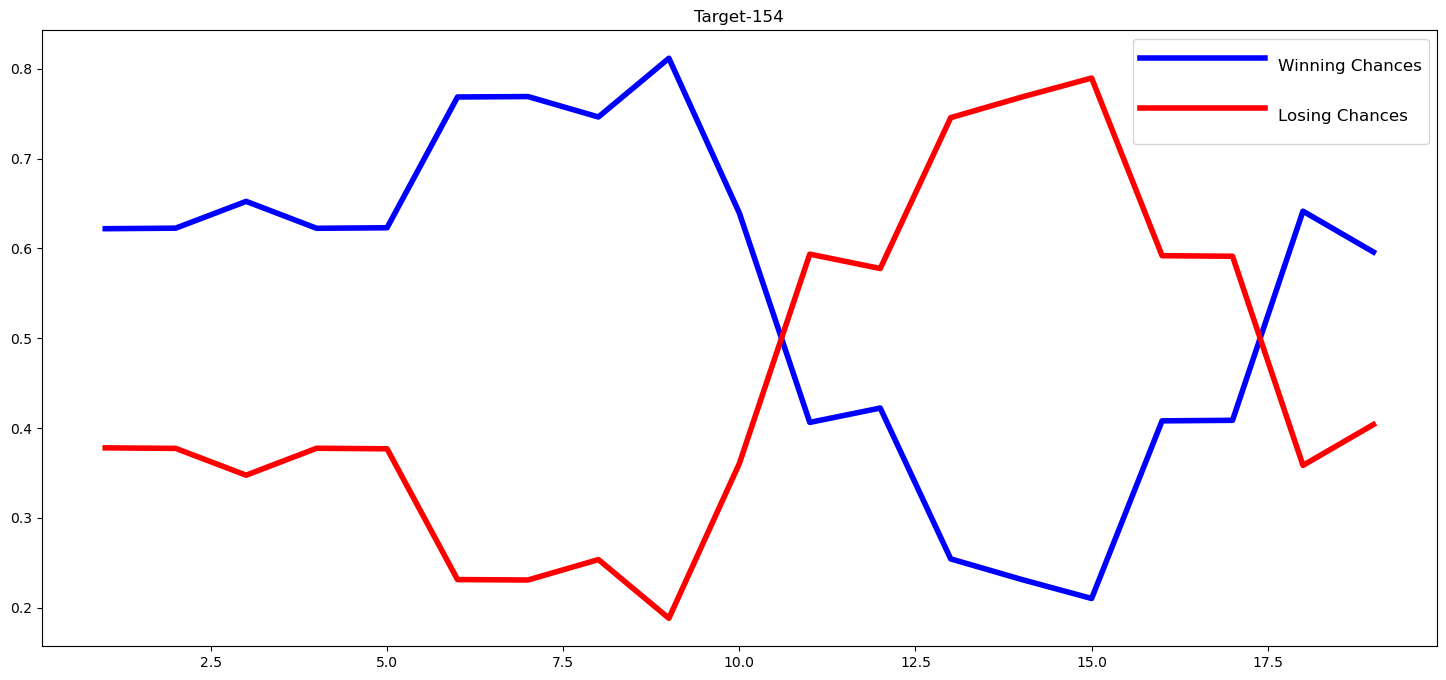

In [60]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(over[1:],test_df_['win'],color='blue',linewidth=4,label='Winning Chances')
plt.plot(over[1:],test_df_['lose'],color='red',linewidth=4,label='Losing Chances')
plt.title('Target-' + str(target))
plt.legend(loc='best',handlelength=7.5, handleheight=3.5,fontsize='large')

In [61]:
import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))